In [350]:
# 数据导入
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
data=pd.read_excel(r"问题一（中国）(1).xlsx",sheet_name="Sheet1",index_col=0)
y=data["消费市场规模/亿元"]
# x=data[["宠物家庭渗透率","新增注册的宠物企业数量/千","人均可支配收入/万元"]]
# x=data[data.columns.drop(["消费市场规模/亿元","人均单只宠物支出"])]
x=data[data.columns.drop("消费市场规模/亿元")]

|人均GDP/万元	|人均GDP增速	|人均可支配收入/万元	|人均可支配收入增速	|城镇化率	|消费者信心指数	|65周岁及以上人群占比	粗结婚率	|出生率	|平均家庭户规模/人	|宠物家庭渗透率	|新增注册的宠物企业数量/千|

In [2]:
# # 添加常数项（截距）
# X = sm.add_constant(x)
# # 构建模型并拟合
# model = sm.OLS(y, X).fit()b
# # 获取回归结果b
# print(model.summary())

In [57]:
# from sklearn.feature_selection import SelectKBest, f_regression

# selector = SelectKBest(score_func=f_regression, k=4)  # 选择 5 个重要特征
# X_selected = selector.fit_transform(x, y)
# print("选择的特征:", x.columns[selector.get_support()])
# select_feature=x.columns[selector.get_support()]

选择的特征: Index(['人均可支配收入/万元', '城镇化率', '65周岁及以上人群占比', '宠物家庭渗透率'], dtype='object')


In [351]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV,Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(x)  # 标准化特征矩阵 X
y_scaled=scaler_y.fit_transform(y.values.reshape(-1, 1))
lgs=LinearRegression()
ridge=Ridge()
rfe = RFE(estimator=ridge, n_features_to_select=3)
X_selected = rfe.fit(X_scaled, y_scaled)
print(x.columns)
print("rank:",rfe.ranking_)
select_feature = x.columns[rfe.support_]
print("选择的特征:", x.columns[rfe.support_])

# lgs.fit(X_selected, y_scaled)
# y_pred = lgs.predict(X_selected)
# coefficients = lgs.coef_[0]
# print("回归系数:", coefficients)

# 结合特征名称与系数
# coef_df = pd.DataFrame({"Feature": selected_features, "Coefficient": coefficients})
# print(coef_df)
# 使用模型对数据进行预测
# y_pred = lgs.predict(x)
# # 计算 R²
# r2 = r2_score(y, y_pred)
# print("R² (决定系数):", r2)
# # 计算均方误差（MSE）和均方根误差（RMSE）
# mse = mean_squared_error(y, y_pred)
# rmse = np.sqrt(mse)
# print("MSE (均方误差):", mse)
# print("RMSE (均方根误差):", rmse)

Index(['人均GDP/万元', '人均GDP增速', '人均可支配收入/万元', '人均可支配收入增速', '城镇化率', '消费者信心指数',
       '65周岁及以上人群占比', '粗结婚率', '出生率', '平均家庭户规模/人', '宠物家庭渗透率', '人均单只宠物支出',
       '新增注册的宠物企业数量/千'],
      dtype='object')
rank: [ 8  7  1 10  5  2  4 11  6  9  3  1  1]
选择的特征: Index(['人均可支配收入/万元', '人均单只宠物支出', '新增注册的宠物企业数量/千'], dtype='object')


In [ ]:
# X_selected = sm.add_constant(X_selected)  # 加入常数项
# model = sm.OLS(y_scaled, X_selected)      # OLS 回归模型
# results = model.fit()                     # 拟合模型

# # 获取回归分析的详细结果
# print("回归系数:", results.params)
# print("标准误差:", results.bse)
# print("t值:", results.tvalues)
# print("p值:", results.pvalues)
# print("R²:", results.rsquared)
# print("调整后的 R²:", results.rsquared_adj)
# print("F-statistic:", results.fvalue)
# print("p-value of F-statistic:", results.f_pvalue)
# # Create the plot
# plt.figure(figsize=(8, 5))
# plt.barh(range(len(coefficients)), coefficients, align='center', color='skyblue')
# plt.yticks(range(len(coefficients)), select_feature)
# plt.xlabel('Coefficient Value')
# plt.ylabel('Features')
# plt.title('Ridge Coefficients by Feature')
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为系统中的中文字体，如 SimSun 等
# plt.rcParams['axes.unicode_minus'] = False  # 避免负号显示问题
# # Show the plot
# plt.tight_layout()
# plt.show()


# plt.figure(figsize=(10, 6))
# plt.plot(y_scaled, label="True Values", color='blue', marker='o', linestyle='-', markersize=5)
# plt.plot(y_pred, label="Predicted Values", color='red', marker='x', linestyle='--', markersize=5)
# plt.title("True vs Predicted Values", fontsize=14)
# plt.xlabel("Index", fontsize=12)
# plt.ylabel("Value", fontsize=12)
# plt.legend()
# plt.grid(True)
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0.         0.         0.        ]
 [0.125      0.06929348 0.07217046]
 [0.5        0.58559783 0.35301798]
 [0.75       1.         0.45700042]
 [1.         0.97282609 1.        ]]
t-values: [[1.59561391 1.24848002 3.10978215]]
p-values: [[0.2516343  0.33818629 0.0897081 ]]
R²: 0.9624194057561005
Adjusted R²: 0.8496776230244021
F-statistic: [32663675.10954765]
F-statistic p-value: [0.00012862]
Mean Squared Error (MSE): 0.005327110650410811
Ridge Coefficients: [[0.29708179 0.17774088 0.48148717]]
截距: [-0.04391402]
index: Index(['人均可支配收入/万元', '人均单只宠物支出', '新增注册的宠物企业数量/千'], dtype='object')


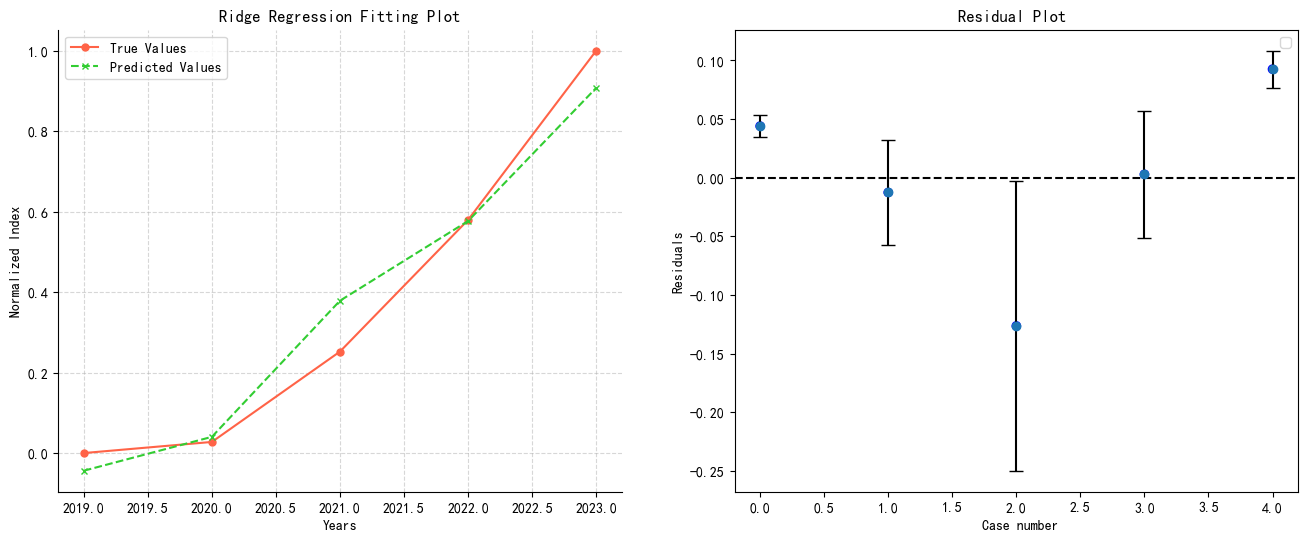

In [361]:
from sklearn.linear_model import RidgeCV,Ridge
from sklearn.model_selection import GridSearchCV
alpha1=0.1
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(x[select_feature])  # 标准化特征矩阵 X
y_scaled=scaler_y.fit_transform(y.values.reshape(-1, 1))

best_ridge_model = Ridge(alpha=alpha1)
best_ridge_model.fit(X_scaled,y_scaled)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_ridge_model.predict(X_scaled)
# print(f"Best alpha: {best_ridge_model.alpha_}")
coefficients = best_ridge_model.coef_
print(X_scaled)

from scipy import stats
# 计算残差
residuals = y_scaled - y_pred
# 计算残差方差
n = len(y_scaled)  # 样本量
p = X_scaled.shape[1]  # 特征数量
MSE = np.mean(residuals ** 2)  # 均方误差
sigma_squared = MSE  # 残差方差
# 计算标准误差
XtX_plus_lambda_I_inv = np.linalg.inv(X_scaled.T @ X_scaled +0.1* np.eye(p))
standard_errors = np.sqrt(sigma_squared * np.diagonal(XtX_plus_lambda_I_inv))
t_values = coefficients / standard_errors
p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=n - p))

# import statsmodels.api as sm
# # 计算p,t
# X_with_intercept = sm.add_constant(X_scaled)
# ols_model = sm.OLS(y, X_with_intercept).fit()
print("t-values:", t_values)
print("p-values:", p_values)

# 计算r2
r2 = best_ridge_model.score(X_scaled, y_scaled)
print(f"R²: {r2}")

# 计算调整后的 R²
n = len(y)  # 样本数量
p = X_scaled.shape[1]  # 特征数量
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R²: {adj_r2}")

# 计算均方误差（MSE）和 R²
mse = mean_squared_error(y_scaled, y_pred)
r2 = r2_score(y_scaled, y_pred)

# 计算 F 值
rss = sum((best_ridge_model.predict(X_scaled) - y_scaled) ** 2)  # 残差平方和
tss = sum((y - np.mean(y)) ** 2)  # 总平方和
f_value = (tss - rss) / p / (rss / (n - p - 1))

import numpy as np
from scipy import stats
F_value = f_value  # F值 (计算结果)
df_model = 3  # 回归模型自由度
df_error = 5 - 3 - 1  # 误差自由度
# 使用 F 分布计算 p 值
p_value_f = stats.f.sf(F_value, df_model, df_error)

print(f"F-statistic: {F_value}")
print(f"F-statistic p-value: {p_value_f}")

print("Mean Squared Error (MSE):", mse)
coefficients = best_ridge_model.coef_
coefficients = coefficients[0]
feature_names=x.columns
print("Ridge Coefficients:", best_ridge_model.coef_)
print("截距:", best_ridge_model.intercept_)
print("index:", select_feature)


# Create the plot
# plt.figure(figsize=(8, 5))
# plt.barh(range(len(coefficients)), coefficients, align='center', color='skyblue')
# plt.yticks(range(len(coefficients)), select_feature)
# plt.xlabel('Coefficient Value')
# plt.ylabel('Features')
# plt.title('Ridge Coefficients by Feature')
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 替换为系统中的中文字体，如 SimSun 等
# plt.rcParams['axes.unicode_minus'] = False  # 避免负号显示问题
# # Show the plot
# plt.tight_layout()
# plt.show()
 
years = [2019, 2020, 2021, 2022, 2023]
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)  # 一行两列的第一个子图
plt.plot(years,y_scaled, label="True Values", color='#FF6347', marker='o', linestyle='-', markersize=5)
plt.plot(years,y_pred, label="Predicted Values", color='#32CD32', marker='x', linestyle='--', markersize=5)
plt.title("Ridge Regression Fitting Plot", fontsize=12)
plt.xlabel("Years", fontsize=10)
plt.ylabel("Normalized Index", fontsize=10)
plt.legend()
plt.grid(True)

# 设置网格线并虚化
plt.grid(True, linestyle='--', alpha=0.5)

# 去掉边框（仅保留坐标轴）
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)  # 保留左边框
plt.gca().spines['bottom'].set_visible(True)  # 保留底边框
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# 计算残差
residuals = y_scaled - y_pred
residuals = residuals.flatten()  # 转换为一维数组



X=X_scaled
# 计算杠杆值 h_i
X_with_intercept = np.c_[np.ones(X.shape[0]), X]  # 加上截距项
H = X_with_intercept @ np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T
leverages = np.diagonal(H)
# 计算每个残差的标准误差 SE(e_i)
residual_stds = np.sqrt(mse * (1 - leverages))
residual_stds = residual_stds.flatten()  # 转换为一维数组
# 计算均方误差（MSE）
mse = mean_squared_error(y_scaled, y_pred)


# 计算每个残差的置信区间（95%）
lower_bound = residuals - 1.96 * residual_stds
upper_bound = residuals + 1.96 * residual_stds

# 绘制残差图
plt.subplot(1, 2, 2)  # 一行两列的第一个子图

# 绘制残差点
plt.scatter(np.arange(len(residuals)), residuals, edgecolors='blue', facecolors='none')
yerr = np.array([residuals - lower_bound, upper_bound - residuals])  # 第一行：残差到下界，第二行：残差到上界
plt.errorbar(np.arange(len(residuals)), residuals, 
             yerr=yerr, fmt='o', ecolor='black', capsize=5)

# 添加水平线
plt.axhline(y=0, color='black', linestyle='--')
# 添加标签和标题
plt.xlabel(' Case number')
plt.ylabel('Residuals')
plt.title('Residual Plot ')
plt.legend()

# 显示图形

plt.savefig(r"问题一拟合曲线.pdf")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


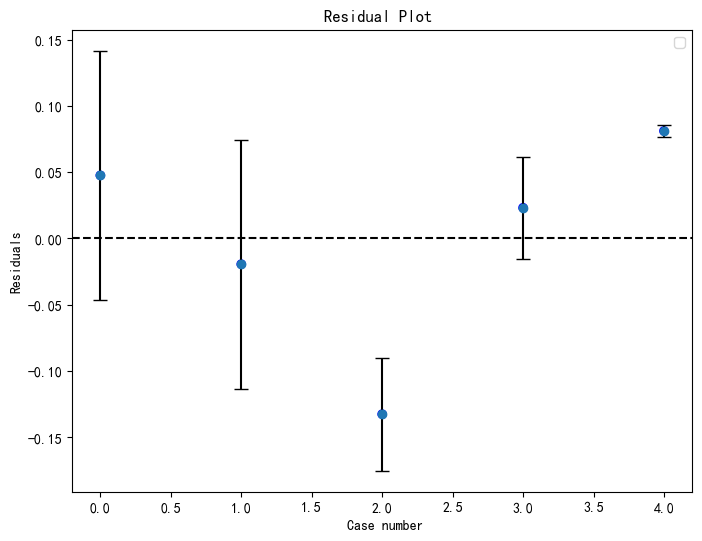

In [270]:
import pandas
from spsspro.algorithm import no_parameter_test
#生成案例数据
data = pandas.Series([1, 2, 3, 4, 5], name="A")
index = pandas.Series(["1", "2", "3", "4", "%"], name="B")
#灰色预测，输入参数详细可以光标放置函数括号内按shift+tab查看，输出结果参考spsspro模板分析报告
print(no_parameter_test.grey_forecasting_analysis(data, index))

Index(['人均可支配收入/万元', '人均单只宠物支出', '新增注册的宠物企业数量/千'], dtype='object') Index(['人均可支配收入/万元', '人均单只宠物支出', '新增注册的宠物企业数量/千'], dtype='object')
[[1920.72899026]
 [2082.310048  ]
 [2731.69684941]
 [3111.64515131]
 [3746.61896103]
 [4425.42381829]
 [5192.83993043]
 [6064.52273937]]


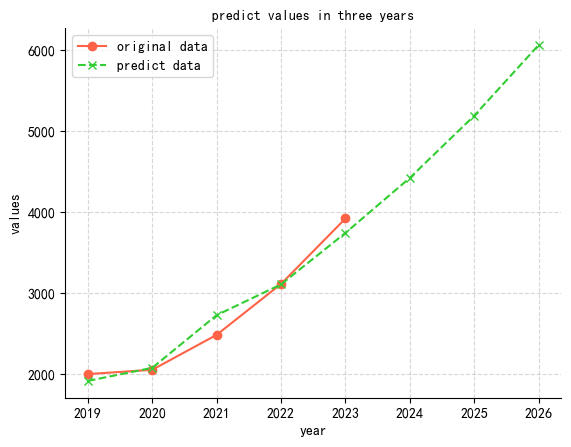

In [472]:
x1_pred=[5105.113,5367.117,5642.569]#人均单只可支配
x2_pred=[2461.942,3281.277,4254.691]#新增宠物企业
x3_pred=[4.182,4.458,4.753] # 人均可支配输入
# x1_pred=[25.728,29.507,33.842]#宠物家庭
# '人均可支配收入/万元', , 
x_pred= {
    '人均可支配收入/万元': x3_pred,
    '人均单只宠物支出': x1_pred,
    '新增注册的宠物企业数量/千': x2_pred
}

X_pred = pd.DataFrame(x_pred)
print(X_pred.columns,x[select_feature].columns)
X_pred_scaled=scaler_X.transform(X_pred)
X_pred_scaleds = np.concatenate([X_scaled, X_pred_scaled])
X_pred_scaleds
y_pred_new= best_ridge_model.predict(X_pred_scaleds)
y_pred_new=scaler_y.inverse_transform(y_pred_new)
years=[2019,2020,2021,2022,2023,2024,2025,2026]
# 绘制实际值与预测值
plt.plot(years[0:5], y, label="original data", marker='o', linestyle='-', color='#FF6347')
plt.plot(years, y_pred_new, label="predict data", marker='x', linestyle='--', color='#32CD32')
plt.grid(True, linestyle='--', alpha=0.5)

# 去掉边框（仅保留坐标轴）
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)  # 保留左边框
plt.gca().spines['bottom'].set_visible(True)  # 保留底边框
# 添加图形标题和标签
plt.title("predict values in three years",fontsize=10)
plt.xlabel("year",fontsize=10)
plt.ylabel("values",fontsize=10)
plt.legend()
# plt.savefig(r"问题一预测曲线.pdf")
# 显示图形
# plt.show()
print(y_pred_new)

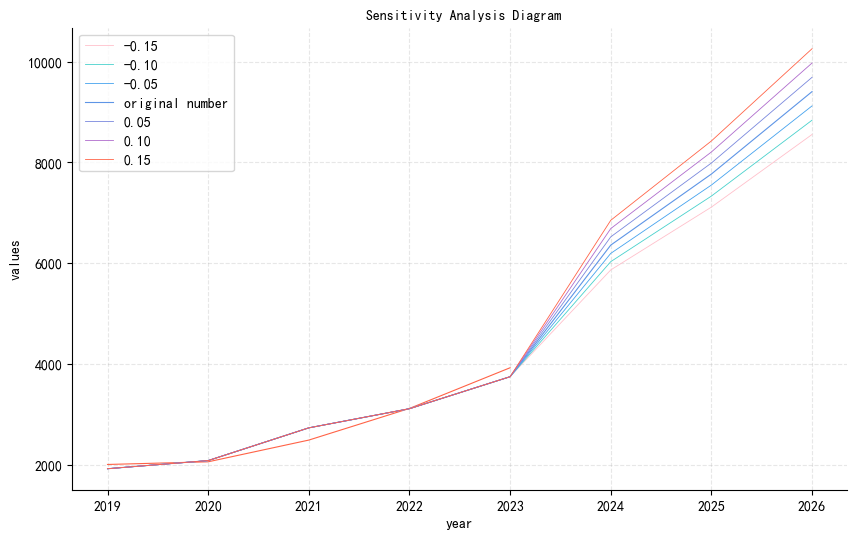

In [470]:
pred_list={}
x_pred_test=X_pred.copy()
plt.figure(figsize=(10,6))
plt.plot(years[0:5], y, linestyle='-', linewidth=0.8,color='000000')
colors = [ '#FFC0CB','#48D1CC', '#44a2ee', '#5e95e6', '#7987dd', '#af6bcc', '#FF6347']
# colors = ['#8B0000', '#FF7F50', '#FF6347', '#D2691E', '#FF4500', '#FF6347', '#8B4513']
#0ebeff
 #29b0f7
 #44a2ee
 #5e95e6
 #7987dd
 #9479d5
 #af6bcc
 #c95ec4
 #e450bb
for i,color in zip(np.arange(0.85, 1.16, 0.05),colors):  
    # print(X_pred)
    x_pred_test['新增注册的宠物企业数量/千']=X_pred['新增注册的宠物企业数量/千']*i
    x_pred_scaled_test=scaler_X.transform(x_pred_test)
    x_pred_scaleds=np.concatenate([X_scaled,x_pred_scaled_test])
    y_pred_new_test=best_ridge_model.predict(x_pred_scaleds)
    y_pred_new=scaler_y.inverse_transform(y_pred_new_test)
    if i<1.01 and  i>0.99: 
        plt.plot(years, y_pred_new, label="original number", linestyle='-',linewidth=, color=color)
    else: 
        plt.plot(years, y_pred_new, label=f"{(i-1):.2f}",  linestyle='-', linewidth=0.6,color=color)
plt.grid(True, linestyle='--', alpha=0.3)
# 去掉边框（仅保留坐标轴）
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)  # 保留左边框
plt.gca().spines['bottom'].set_visible(True)  # 保留底边框
plt.title(" Sensitivity Analysis Diagram",fontsize=10)
plt.xlabel("year",fontsize=10)
plt.ylabel("values",fontsize=10)
plt.legend()
# plt.savefig(r"D:\adocument\数学建模\324亚太\2024 APMCM Problem C\灵敏度分析.pdf")
plt.show()

In [284]:
import pandas as pd 
import numpy as np
data1=pd.read_excel(r"D:\adocument\数学建模\324亚太\2024 APMCM Problem C\宠物饲料出口额.xlsx")
data1['post'] = np.where(data1['数据年月'] >= 201905, 1, 0)
data1['数据年月'] = pd.to_datetime(data1['数据年月'], format='%Y%m')
data1['数据年月'] =data1['数据年月'].dt.to_period('M')

,数据年月,猫狗宠物饲料出口\美元,法国,美国,日本,post
0,2018-01,69106699,292036,25701825,9376516,0
1,2018-02,62197478,495100,25011638,5848468,0
2,2018-03,56512033,55000,20565359,8559894,0
3,2018-04,78609509,146637,28759995,8501445,0
4,2018-05,79072015,378931,29343123,8828545,0
...,...,...,...,...,...,...
67,2023-08,103409037,580255,21647143,8410561,1
68,2023-09,111547290,817272,25152986,10221803,1
69,2023-10,100945837,257063,22204016,8924132,1
70,2023-11,104477659,529415,17241196,10300064,1


In [236]:
# 美国政策影响
data_us=data1[['数据年月','美国','post']].copy()
data_jp=data1[['数据年月','日本','post']].copy()
data_us=data_us.rename(columns={'美国': 'value'})
data_jp=data_jp.rename(columns={'日本': 'value'})
data_us['country']='美国'
data_jp['country']='日本'
data_us['实验组']=1
data_jp['实验组']=0
data2=pd.concat([data_us[['数据年月','country', 'post', 'value','实验组']],
                         data_jp[['数据年月','country', 'post', 'value','实验组']]], axis=0, ignore_index=True)

# data2.to_excel(r'output.xlsx', index=False, sheet_name='Data')
print(data2)


import statsmodels.api as sm
policy_date = pd.Period('2018-10', freq='M')
data2['Post19'] = np.where(data2['数据年月'] >= '2018-9',1, 0)  # 假设2019年是干预的时间点
data2['Post20']=np.where(data2['数据年月'] >= '2020-4',1, 0)
data2['Post23']=np.where(data2['数据年月'] >= '2023-10',1, 0)
data2.loc[data2['数据年月'] >= '2019-5', 'Post19'] = 2  # 2019年5月开始
# data2.loc[data2['数据年月'] >= '2020-3', 'Post'] = 2  # 2019年5月开始
# policy_start = pd.Period('2018-10', freq='M')
# # 定义政策持续时间（递增的持续性效应）
# data2['Negative_Policy_Duration'] = data2['数据年月'].apply(
#     lambda x: (x - policy_start).n if x >=policy_start else 0
# )
# policy_start = pd.Period('2019-5', freq='M')
# # 定义政策持续时间（递增的持续性效应）
# data2['Negative_Policy_Duration'] = data2['数据年月'].apply(
#     lambda x: (x - policy_start).n*2 if x >=policy_start else 1
# )
# policy_start = pd.Period('2020-3', freq='M')
# data2['Positive_Policy_Duration'] = data2['数据年月'].apply(
#     lambda x: (x- policy_start).n if x >=policy_start else 0
# )
data2['Treatment'] = np.where(data2['country'] == '美国', 1, 0)
data2['neg_Treatment0'] = data2['Post19'] * data2['Treatment']
data2['pos_Treatment']=data2['Post20'] * data2['Treatment']
data2['neg_Treatment1']=data2['Post23'] * data2['Treatment']
data2

X = data2[['Post19','Post23','Treatment', 'neg_Treatment0','pos_Treatment','neg_Treatment1']]
y = data2['value']

# 在自变量X中加入常数项（截距）
X = sm.add_constant(X)

# 拟合OLS回归模型（即DID模型）
model = sm.OLS(y, X).fit()

# 查看回归结果
print(model.summary())

        数据年月 country  post     value  实验组
0    2018-01      美国     0  25701825    1
1    2018-02      美国     0  25011638    1
2    2018-03      美国     0  20565359    1
3    2018-04      美国     0  28759995    1
4    2018-05      美国     0  29343123    1
..       ...     ...   ...       ...  ...
139  2023-08      日本     1   8410561    0
140  2023-09      日本     1  10221803    0
141  2023-10      日本     1   8924132    0
142  2023-11      日本     1  10300064    0
143  2023-12      日本     1  11157976    0

[144 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     57.62
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           4.34e-35
Time:                        16:18:19   Log-Likelihood:                -2409.

In [152]:
# 欧盟政策影响
data_us=data1[['数据年月','法国','post']].copy()
data_jp=data1[['数据年月','日本','post']].copy()
data_us=data_us.rename(columns={'法国': 'value'})
data_jp=data_jp.rename(columns={'日本': 'value'})
data_us['country']='法国'
data_jp['country']='日本'
data_us['实验组']=1
data_jp['实验组']=0
data2=pd.concat([data_us[['数据年月','country', 'post', 'value','实验组']],
                         data_jp[['数据年月','country', 'post', 'value','实验组']]], axis=0, ignore_index=True)
data2['数据年月'] = pd.to_datetime(data2['数据年月'], format='%Y%m')
data2['数据年月'] =data2['数据年月'].dt.to_period('M')
# data2.to_excel(r'output.xlsx', index=False, sheet_name='Data')
print(data2)


import statsmodels.api as sm
policy_date = pd.Period('2018-10', freq='M')
data2['Post19'] = np.where(data2['数据年月'] >= '2021-11',1, 0)  # 假设2019年是干预的时间点
# data2['Post20']=np.where(data2['数据年月'] >= '2020-3',1, 0)
# data2.loc[data2['数据年月'] >= '2019-6', 'Post19'] = 2  # 2019年5月开始
# data2.loc[data2['数据年月'] >= '2020-3', 'Post'] = 2  # 2019年5月开始
# policy_start = pd.Period('2018-10', freq='M')
# # 定义政策持续时间（递增的持续性效应）
# data2['Negative_Policy_Duration'] = data2['数据年月'].apply(
#     lambda x: (x - policy_start).n if x >=policy_start else 0
# )
# policy_start = pd.Period('2019-5', freq='M')
# # 定义政策持续时间（递增的持续性效应）
# data2['Negative_Policy_Duration'] = data2['数据年月'].apply(
#     lambda x: (x - policy_start).n*2 if x >=policy_start else 1
# )
# policy_start = pd.Period('2020-3', freq='M')
# data2['Positive_Policy_Duration'] = data2['数据年月'].apply(
#     lambda x: (x- policy_start).n if x >=policy_start else 0
# )
data2['Treatment'] = np.where(data2['country'] == '法国', 1, 0)
data2['neg_Treatment'] = data2['Post19'] * data2['Treatment']
# data2['pos_Treatment']=data2['Post20'] * data2['Treatment']
data2

X = data2[['Post19', 'Treatment', 'neg_Treatment']]
y = data2['value']

# 在自变量X中加入常数项（截距）
X = sm.add_constant(X)

# 拟合OLS回归模型（即DID模型）
model = sm.OLS(y, X).fit()

# 查看回归结果
print(model.summary())

        数据年月 country  post     value  实验组
0    2018-01      法国     0    292036    1
1    2018-02      法国     0    495100    1
2    2018-03      法国     0     55000    1
3    2018-04      法国     0    146637    1
4    2018-05      法国     0    378931    1
..       ...     ...   ...       ...  ...
139  2023-08      日本     1   8410561    0
140  2023-09      日本     1  10221803    0
141  2023-10      日本     1   8924132    0
142  2023-11      日本     1  10300064    0
143  2023-12      日本     1  11157976    0

[144 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     737.1
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.59e-85
Time:                        15:07:06   Log-Likelihood:                -2202.

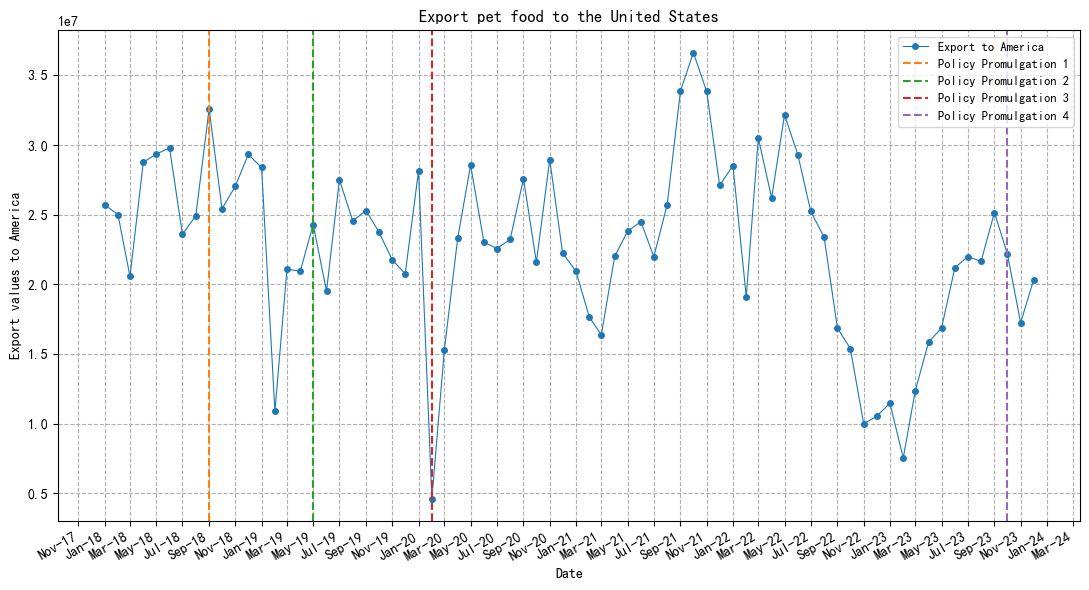

0    2018-01-01
1    2018-02-01
2    2018-03-01
3    2018-04-01
4    2018-05-01
        ...    
67   2023-08-01
68   2023-09-01
69   2023-10-01
70   2023-11-01
71   2023-12-01
Name: 数据年月_m, Length: 72, dtype: datetime64[ns]

In [345]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
data1['数据年月_m'] = data1['数据年月'].dt.to_timestamp()
data1['数据年月_m']=pd.to_datetime(data1['数据年月_m'], format='%Y%m')
plt.figure(figsize=(11, 6))  # 设置图形大小
plt.plot(data1['数据年月_m'], data1['美国'], marker='o',markersize=4, linestyle='-', color='#1f77b4', label='Export to America',linewidth=0.8)  # 绘制折线图
plt.xlabel('Date')  # x轴标签
plt.ylabel('Export values to America')  # y轴标签
plt.title('Export pet food to the United States')  # 图表标题

plt.axvline(pd.to_datetime('2018-09'), color='#ff7f0e', linestyle='--', label='Policy Promulgation 1')
plt.axvline(pd.to_datetime('2019-05'), color='#2ca02c', linestyle='--', label='Policy Promulgation 2')
plt.axvline(pd.to_datetime('2020-02'), color='#d62728', linestyle='--', label='Policy Promulgation 3')
plt.axvline(pd.to_datetime('2023-10'), color='#9467bd', linestyle='--', label='Policy Promulgation 4')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# plt.xticks(rotation=30)  # 旋转x轴标签，以避免重叠
plt.gcf().autofmt_xdate()
plt.grid(True)  # 添加网格
plt.legend()  # 显示图例
plt.tight_layout()  # 调整图形，以防标签重叠
plt.grid(True, linestyle='--', alpha=1)
plt.legend(loc='upper right',fontsize=9)
plt.savefig(r"American export.pdf")
plt.show()
data1['数据年月_m']

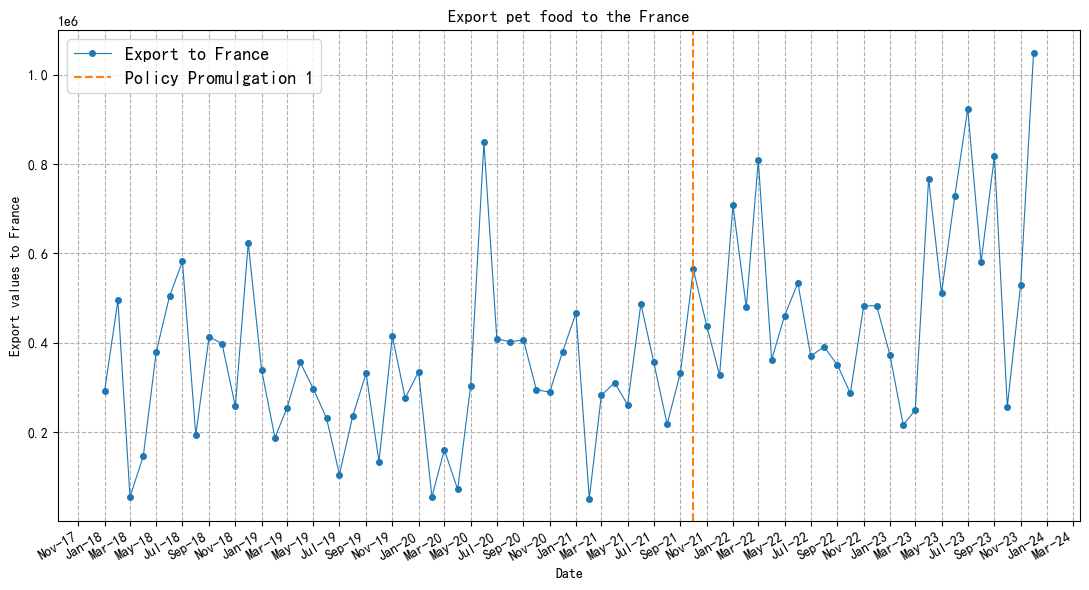

In [349]:
data1['数据年月_m'] = data1['数据年月'].dt.to_timestamp()
data1['数据年月_m']=pd.to_datetime(data1['数据年月_m'], format='%Y%m')
plt.figure(figsize=(11, 6))  # 设置图形大小
plt.plot(data1['数据年月_m'], data1['法国'], marker='o',markersize=4, linestyle='-', color='#1f77b4', label='Export to France',linewidth=0.8)  # 绘制折线图
plt.xlabel('Date')  # x轴标签
plt.ylabel('Export values to France')  # y轴标签
plt.title('Export pet food to the France')  # 图表标题

plt.axvline(pd.to_datetime('2021-10'), color='#ff7f0e', linestyle='--', label='Policy Promulgation 1')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# plt.xticks(rotation=30)  # 旋转x轴标签，以避免重叠
plt.gcf().autofmt_xdate()
plt.grid(True)  # 添加网格
plt.legend()  # 显示图例
plt.tight_layout()  # 调整图形，以防标签重叠
plt.grid(True, linestyle='--', alpha=1)
plt.legend(fontsize=13)
plt.savefig(r"France export.pdf")
plt.show()